# Climate Analysis and Exploration

In [14]:
# Dependencies 
import sqlalchemy
from sqlalchemy.ext.automap import automap_base 
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [2]:
# Connect to the sqlite database
engine = create_engine("sqlite:///hawaii.sqlite")

## Explore the Database

In [15]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [17]:
measurement_columns = inspector.get_columns("measurement")
for c in measurement_columns:
    print(c["name"], c["type"])

id INTEGER
station VARCHAR
date VARCHAR
prcp FLOAT
tobs INTEGER


In [18]:
station_columns = inspector.get_columns("station")
for c in station_columns:
    print(c["name"], c["type"])

id INTEGER
station VARCHAR
name VARCHAR
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [3]:
# Reflect the tables into classes 
Base = automap_base()

Base.prepare(engine, reflect=True)

In [5]:
# Save a reference to the classes
Measurement = Base.classes.measurement
Station = Base.classes.station

In [6]:
# Start a session to query the database
session = Session(bind=engine)

In [12]:
measurement_results = session.query(Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).all()
station_results = session.query(Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation).all()

In [53]:
#measurement_results
#station_results

## Precipitation Analysis

In [33]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [19]:
# Get the latest date 
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [57]:
# Get the last 12 months of precipitation data 
last_12_months_date = session.query(Measurement.date).filter(Measurement.date > "2016-08-22").order_by(Measurement.date).all()
last_12_months_date
date = [date[0] for date in last_12_months_date]
#date

In [59]:
last_12_months_prcp = session.query(Measurement.prcp).filter(Measurement.date > "2016-08-22").order_by(Measurement.date).all()
last_12_months_prcp
precipitation = [rain[0] for rain in last_12_months_prcp]
#precipitation

In [60]:
prcp_df = pd.DataFrame({
    "Date": date, 
    "Precipitation": precipitation
}).set_index("Date")

In [62]:
prcp_df.head()

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79


In [70]:
prcp_df.plot.bar()

plt.title("Precipitation in the Last 12 Months in Hawaii")
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.ylim(0, 2.5)
plt.tight_layout()

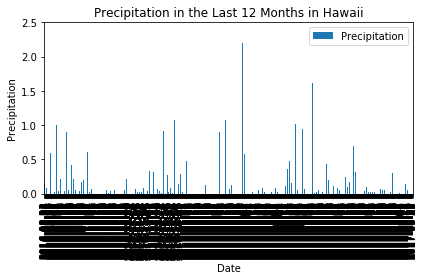

In [71]:
plt.show()

In [72]:
# Summary statistics for the precipitation data 
prcp_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


## Station Analysis

In [76]:
# Calculating the total number of stations
stations_count = session.query(Station).filter(Station.station == Station.station).count()
stations_count

9

In [ ]:
# Find the most active station 


## Temperature Analysis